### Data charts, after clean the data

In [1]:
import pandas as pd 
import numpy as np
import io 
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import random 

In [2]:
data = pd.read_csv('after_multiannual_5pc.csv')

In [3]:
data.head()

,Unnamed: 0,ETER ID,National identifier,English Institution Name,Country Code,Region of establishment (NUTS 2),Students enrolled at ISCED 8 - men,Students enrolled at ISCED 8 - women,Students enrolled ISCED 8 - gender unclassified,Students enrolled at ISCED 8 - national,...,Non-personnel expenditure (EURO),Expenditure unclassified (EURO),Total Current expenditure (EURO),Capital expenditure (EURO),Basic government allocation (EURO),Total Current revenues (EURO),Research active institution,Included in official R&D statistics,R&D Expenditure (EURO),Year
0,1178,ES0001,None,University of Almeria,ES,ES61,374,440,0,499,...,None,None,None,None,None,None,1,1,None,2016
1,1179,ES0002,None,University of CÃ¡diz,ES,ES61,468,403,0,679,...,None,None,None,None,None,None,1,1,None,2016
2,1180,ES0003,None,University of Cordoba,ES,ES61,615,640,0,893,...,None,None,None,None,None,None,1,1,None,2016
3,1181,ES0004,None,University of Granada,ES,ES61,1462,1267,0,1958,...,None,None,None,None,None,None,1,1,None,2016
4,1182,ES0005,None,University of Huelva,ES,ES61,240,180,0,303,...,None,None,None,None,None,None,1,1,None,2016


In [4]:
data.columns

Index(['Unnamed: 0', 'ETER ID', 'National identifier',
       'English Institution Name', 'Country Code',
       'Region of establishment (NUTS 2)',
       'Students enrolled at ISCED 8 - men',
       'Students enrolled at ISCED 8 - women',
       'Students enrolled ISCED 8 - gender unclassified',
       'Students enrolled at ISCED 8 - national',
       'Students enrolled at ISCED 8 - foreigner',
       'Students enrolled at ISCED 8 - resident',
       'Students enrolled at ISCED 8 - mobile',
       'Total students enrolled at ISCED 8', 'Graduates at ISCED 8 - men',
       'Graduates at ISCED 8 - women',
       'Graduates at ISCED 8 - gender unclassified',
       'Graduates at ISCED 8 - national', 'Graduates at ISCED 8 - foreigner',
       'Graduates at ISCED 8 - resident', 'Graduates at ISCED 8 - mobile',
       'Total graduates at ISCED 8', 'Erasmus incoming students - ISCED 8',
       'Erasmus outgoing students - ISCED 8', 'PhD intensity',
       'Geographic coordinates - latitude',

In [5]:
data = data.replace('None', '0')
data['Students enrolled at ISCED 8 - men'] = data['Students enrolled at ISCED 8 - men'].astype(int)
data['Students enrolled at ISCED 8 - women'] = data['Students enrolled at ISCED 8 - women'].astype(int)

In [6]:
tot_stud_enrolled_men = data.groupby(['Country Code'])['Students enrolled at ISCED 8 - men'].sum()
tot_stud_enrolled_wom = data.groupby(['Country Code'])['Students enrolled at ISCED 8 - women'].sum()

In [7]:
tot_stud_enrolled_men

Country Code
ES    77088
FI    38304
IT    66161
NO    28027
PT    20082
SE    65727
Name: Students enrolled at ISCED 8 - men, dtype: int64

In [8]:
tot_stud_enrolled_wom

Country Code
ES    75631
FI    50855
IT    67902
NO    29660
PT    20823
SE    61128
Name: Students enrolled at ISCED 8 - women, dtype: int64

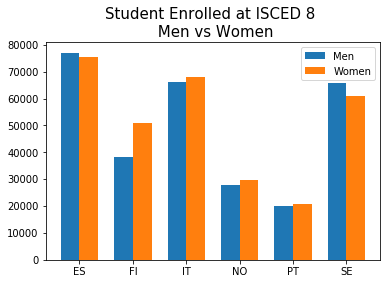

In [9]:
# Histogram for the enrolled student: comparisong between men and women 
labels = ['ES', 'FI', 'IT', 'NO', 'PT', 'SE']
men_means = list(tot_stud_enrolled_men)
women_means = list(tot_stud_enrolled_wom)
x = np.arange(len(labels)) 
width = 0.35 


fig100, ax = plt.subplots()

rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.set_title('Student Enrolled at ISCED 8 \n Men vs Women', fontsize=15)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

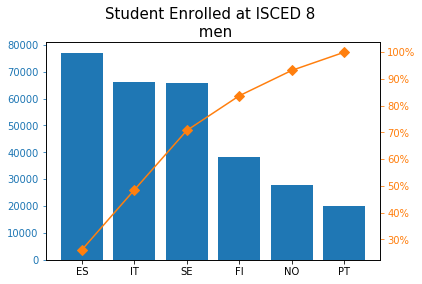

In [10]:
# Pareto chart - gender gap for enrolled student 
df = pd.DataFrame({'Enrolled-men': list(tot_stud_enrolled_men)})
df.index = labels
df = df.sort_values(by='Enrolled-men',ascending=False)
df["cumpercentage"] = df["Enrolled-men"].cumsum()/df["Enrolled-men"].sum()*100


fig, ax = plt.subplots()
ax.bar(df.index, df["Enrolled-men"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_title('Student Enrolled at ISCED 8 \n men', fontsize=15)
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

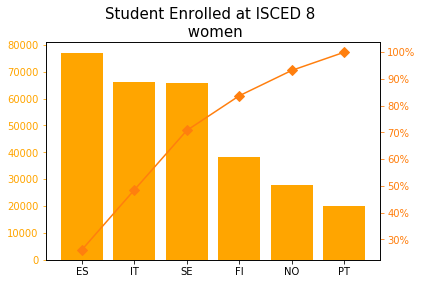

In [11]:
df = pd.DataFrame({'Enrolled-wom': list(tot_stud_enrolled_men)})
df.index = labels
df = df.sort_values(by='Enrolled-wom',ascending=False)
df["cumpercentage"] = df["Enrolled-wom"].cumsum()/df["Enrolled-wom"].sum()*100


fig, ax = plt.subplots()
ax.bar(df.index, df["Enrolled-wom"], color="orange")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_title('Student Enrolled at ISCED 8 \n women', fontsize=15)
ax.tick_params(axis="y", colors="orange")
ax2.tick_params(axis="y", colors="C1")
plt.show()

In [12]:
# scatterplot
# take a sample of data to create a more readible plot 
# Enrolled students - men vs women 
l_enr_men = list(data['Students enrolled at ISCED 8 - men'])
l_enr_wom = list(data['Students enrolled at ISCED 8 - women'])
l_enr_men = list(filter(lambda a: a != 0, l_enr_men))
l_enr_wom = list(filter(lambda a: a != 0, l_enr_wom))

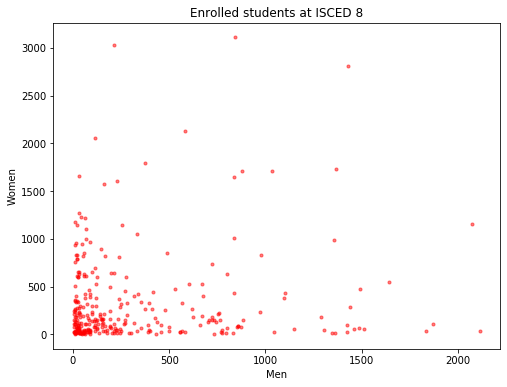

In [13]:
plt.figure(figsize=(8, 6))

x = random.sample(l_enr_men, 300)
y = random.sample(l_enr_wom, 300)

area = np.pi*3

plt.scatter(x, y, s=area, alpha=0.5, color='red')
plt.title('Enrolled students at ISCED 8')
plt.xlabel('Men')
plt.ylabel('Women')
plt.show()

In [14]:
variables_exp = ['Total Current expenditure (EURO)', 'R&D Expenditure (EURO)']
data[variables_exp] = data[variables_exp].apply(pd.to_numeric, errors='coerce')
data['difference'] = data['Total Current expenditure (EURO)'] - data['R&D Expenditure (EURO)']

In [15]:
data = data[(data['difference'] >= 0) | (data['difference'].isnull())]

In [16]:
data['Total Current expenditure (EURO)'] = data['Total Current expenditure (EURO)'].astype(int)
data['R&D Expenditure (EURO)'] = data['R&D Expenditure (EURO)'].astype(int)

In [17]:
tot_exp = data.groupby(['Country Code'])['Total Current expenditure (EURO)'].sum()
tot_rd = data.groupby(['Country Code'])['R&D Expenditure (EURO)'].sum()

In [18]:
tot_exp

Country Code
ES              0
FI    11790351535
IT    45167809483
NO    22669277947
PT     2729775598
SE    39068015791
Name: Total Current expenditure (EURO), dtype: int64

In [19]:
tot_rd

Country Code
ES              0
FI     5295700490
IT              0
NO     4545079823
PT              0
SE    22736010209
Name: R&D Expenditure (EURO), dtype: int64

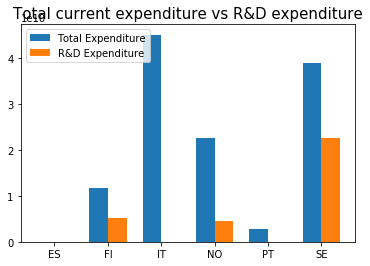

In [20]:
# Histogram for expenditure
labels = ['ES', 'FI', 'IT', 'NO', 'PT', 'SE']
tot_exp_means = list(tot_exp)
tot_rd_means = list(tot_rd)
x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tot_exp_means, width, label='Total Expenditure')
rects2 = ax.bar(x + width/2, tot_rd_means, width, label='R&D Expenditure')

ax.set_title('Total current expenditure vs R&D expenditure', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')